<center>
    
# NYC AIRBNB LISTINGS ANALYSIS
    
</center>

![](https://img2-ab.cityrealty.com/neo/i/p/mig/airbnb_guide.jpg)

## 1. Introduction to the Problem and Data

### 1.1. Project Objective

The aim of this project is to conduct an in-depth analysis of the Airbnb New York City 2019 dataset. The primary objectives are to:

#### Understand the Dynamics of Airbnb Listings in NYC: 
I seek to explore various aspects of Airbnb listings, such as pricing, location, and room type. By analyzing these features, I aim to uncover patterns and trends that characterize the Airbnb market in New York City for 2019.

#### Identify Key Factors Influencing Price and Popularity: 
A significant part of the analysis will focus on identifying factors that impact the price of listings and their popularity (as indicated by the number of reviews). This will help in understanding what makes certain listings more attractive or valuable than others.

#### Provide Insights for Stakeholders: 
The insights derived from this analysis are intended to benefit multiple stakeholders, including Airbnb hosts who want to optimize their listings, potential renters seeking to understand pricing patterns, and market analysts interested in the dynamics of the sharing economy in urban settings.

### 1.2. About the Dataset

The dataset, titled "AB_NYC_2019.csv", provides a comprehensive overview of Airbnb listings in New York City for the year 2019. Key features of the dataset include:

#### Source:
My data source is from this kaggle link:
https://www.kaggle.com/datasets/thedevastator/airbnbs-nyc-overview
which was originally sourced from this hugging face nyc airbnb open data:
https://huggingface.co/datasets/gradio/NYC-Airbnb-Open-Data

#### Listing Details: 
Unique identifiers, names, host information, neighborhood data, and types of rooms.

#### Geographical Information: 
Latitude and longitude for precise location mapping.

#### Pricing Information: 
Details about the price, minimum nights required for booking, and availability across the year.

#### Review Metrics: 
Data on the number of reviews, latest review dates, and average reviews per month, offering insights into the popularity and guest experiences of the listings.

### 1.3. Data Significance

This dataset is particularly significant for several reasons:

#### Urban Sharing Economy: 
New York City's vibrant and diverse neighborhoods make it an ideal case study for understanding urban sharing economy trends.

#### Consumer and Host Behavior: 
Analysis of this dataset can reveal insights into consumer preferences and host pricing strategies in one of the world's busiest metropolitan areas.

#### Policy and Regulation Impact: 
With the evolving landscape of short-term rental regulations, this analysis can also provide valuable information on how such regulations might impact market dynamics.

### 1.4. Approach

The project will employ a structured approach, starting with an exploratory data analysis to identify trends, patterns, and anomalies. This will be followed by predictive modeling to understand the factors influencing prices and popularity. The analysis will conclude with comprehensive interpretations of the findings and recommendations for future studies.

## 2. Exploratory Data Analysis

### 2.1. Loading The Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'AB_NYC_2019.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 2.2. Data Overview

In [19]:
# Basic information about the dataset
data.info()

# Descriptive statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 2.3. Data Cleaning

In [20]:
# Handling missing values
data.isnull().sum()
data.fillna({'reviews_per_month': 0}, inplace=True)
data.dropna(subset=['name', 'host_name'], inplace=True)

# Removing outliers for price
q_low = data['price'].quantile(0.01)
q_hi  = data['price'].quantile(0.99)
data_filtered = data[(data['price'] < q_hi) & (data['price'] > q_low)]

### 2.4. Data Visualizations

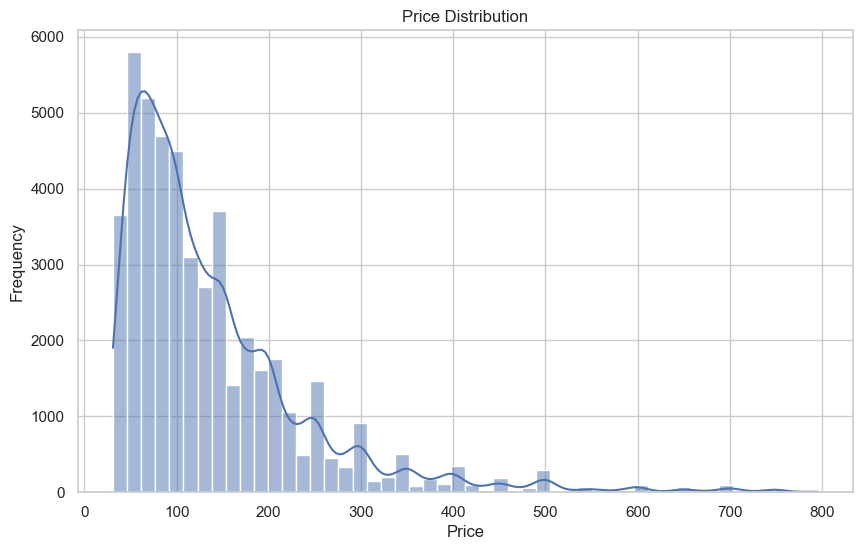

In [21]:
#### Ensure plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Adjusting aesthetics for better readability
sns.set(style="whitegrid")

# 1. Price Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram depicts the overall price distribution for the Airbnb listings, showing a right-skewed distribution with a peak at lower prices. The long tail indicates there are some listings with very high prices, but these are relatively rare.

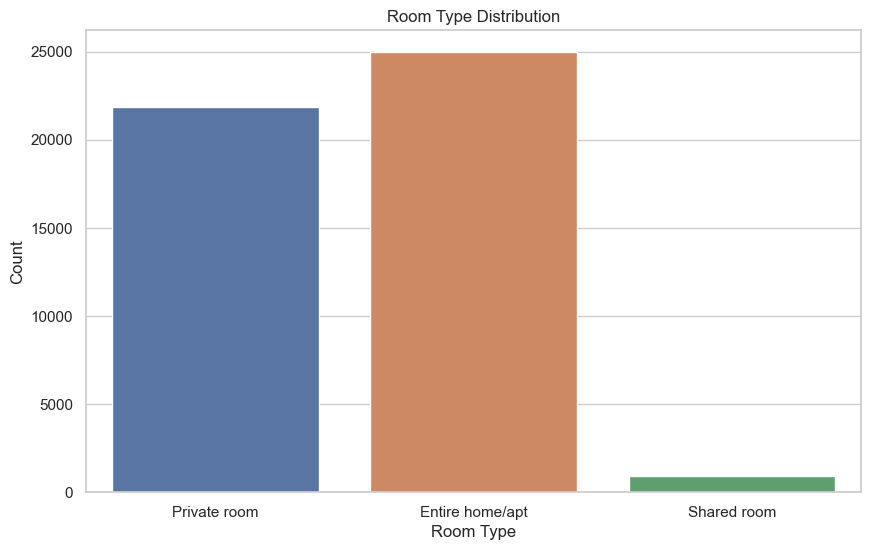

In [22]:
# 2. Room Type Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data_filtered,x='room_type')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

The bar chart presents the count of listings by room type, showing that entire homes/apartments are the most common listing type, followed by private rooms, with shared rooms being the least common.

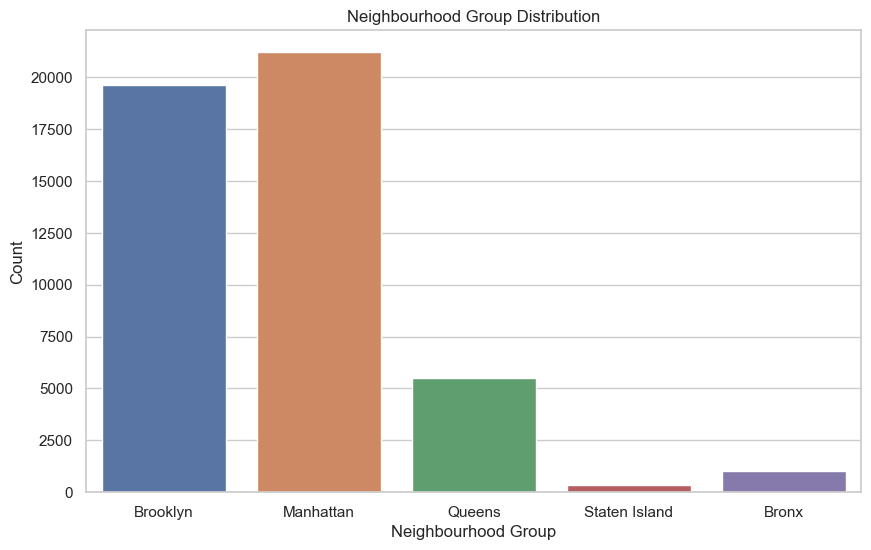

In [23]:
# 3. Neighbourhood Group Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data_filtered,x='neighbourhood_group')
plt.title('Neighbourhood Group Distribution')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

This bar chart presents the count of listings by the neighbourhood. Brooklyn and Manhattan have majority of the listings while queens is the third. Bronx and Staten Island have less than a 1000 listings.

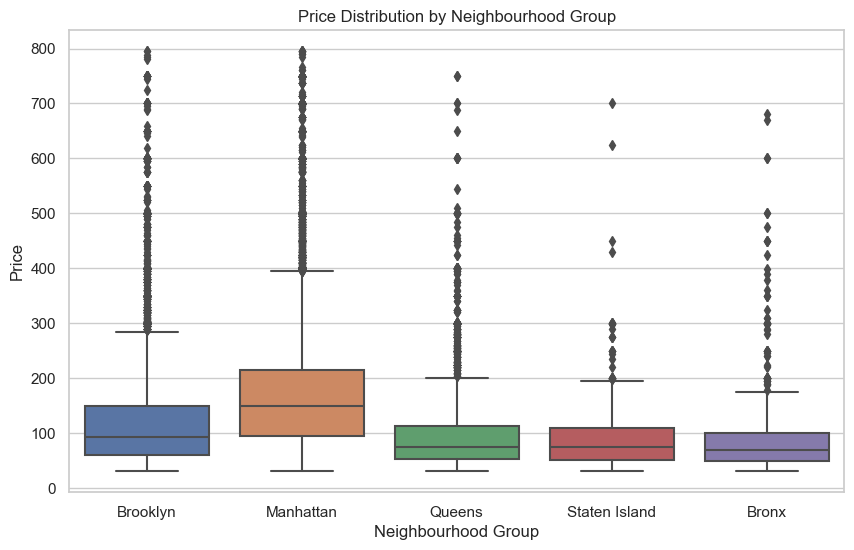

In [24]:
# 4. Price vs. Neighbourhood Group (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=data_filtered)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

This boxplot shows that Manhattan has the highest median price and a wide range of prices, reinforcing the trend seen in the geographical distribution. Brooklyn, while more affordable on average than Manhattan, still has a considerable range of prices. Queens, Staten Island, and the Bronx show more modest median prices.

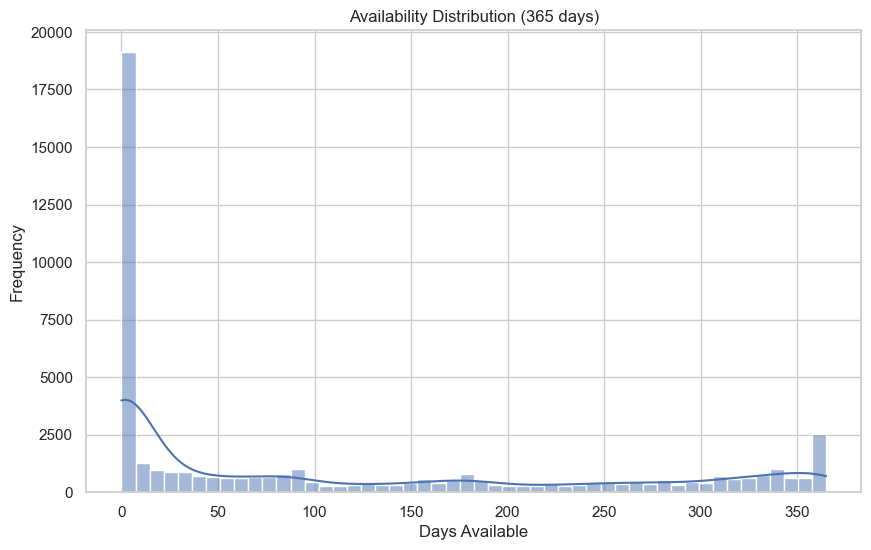

In [25]:
# 5. Availability 365 Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['availability_365'], bins=50, kde=True)
plt.title('Availability Distribution (365 days)')
plt.xlabel('Days Available')
plt.ylabel('Frequency')
plt.show()

This histogram indicates that a large number of properties dont have high availability which means they are rented out quite frequently. However there is a peak at 365 indicating that some properties might be used for other purposes and are not being rented out or nobody is interested in renting them

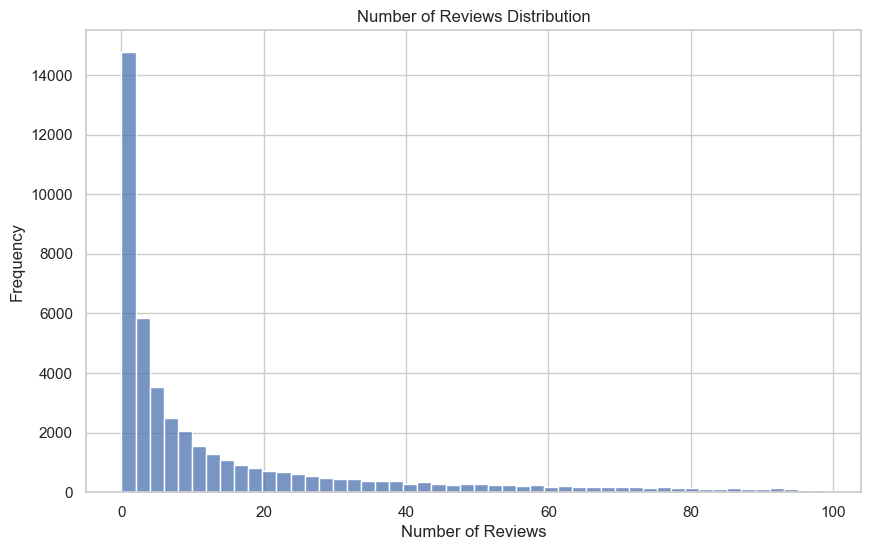

In [26]:
# 6. Number of Reviews Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered[data_filtered['number_of_reviews'] < 100]['number_of_reviews'], bins=50, kde=False)
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

The histogram for the number of reviews per listing shows that a large number of listings have relatively few reviews, which could indicate many new listings or listings that are not frequently rented out.

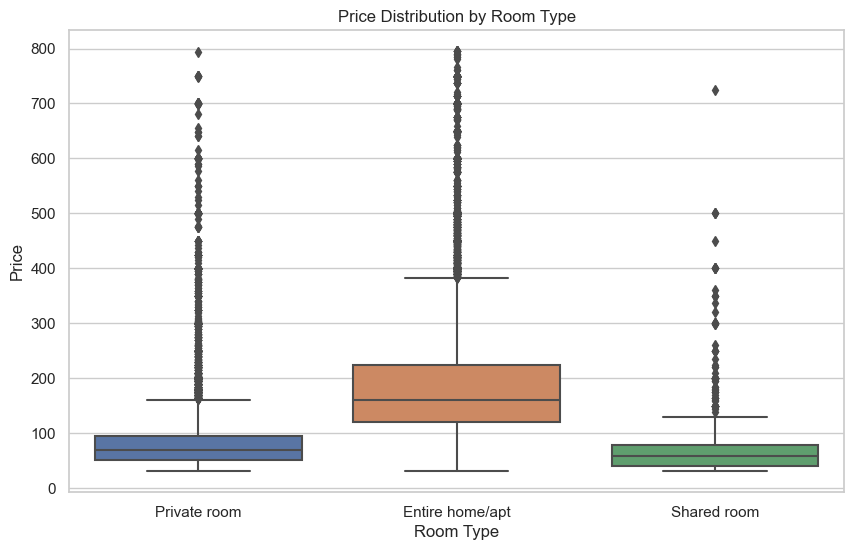

In [27]:
# 7. Price vs. Room Type (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

The boxplots for price distribution across different room types show a wide range of prices for entire homes/apartments, with a higher median price compared to private and shared rooms. The presence of outliers indicates some entire homes/apartments are priced significantly higher than the median, hinting at luxury listings or properties in high-demand areas. Private rooms and shared rooms have a narrower interquartile range, suggesting more consistent pricing among these types of listings.

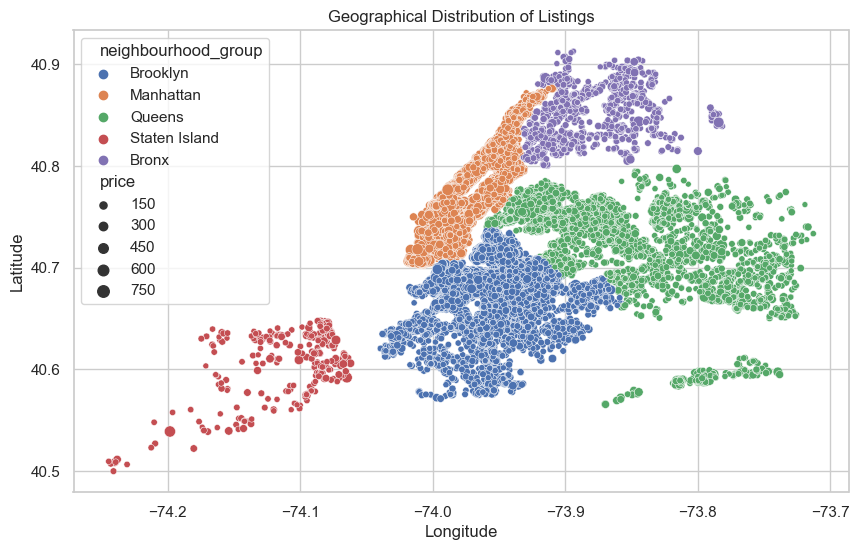

In [28]:
# 8. Geographical Distribution of Listings (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', size='price', data=data_filtered)
plt.title('Geographical Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatter plot illustrates the concentration of Airbnb listings across different neighborhoods, with price indicated by the size of the points. It’s evident that Manhattan and Brooklyn have a high density of listings, with Manhattan commanding higher prices on average. The distribution suggests that the more tourist-centric or central locations are more densely populated with listings and possibly at higher prices.

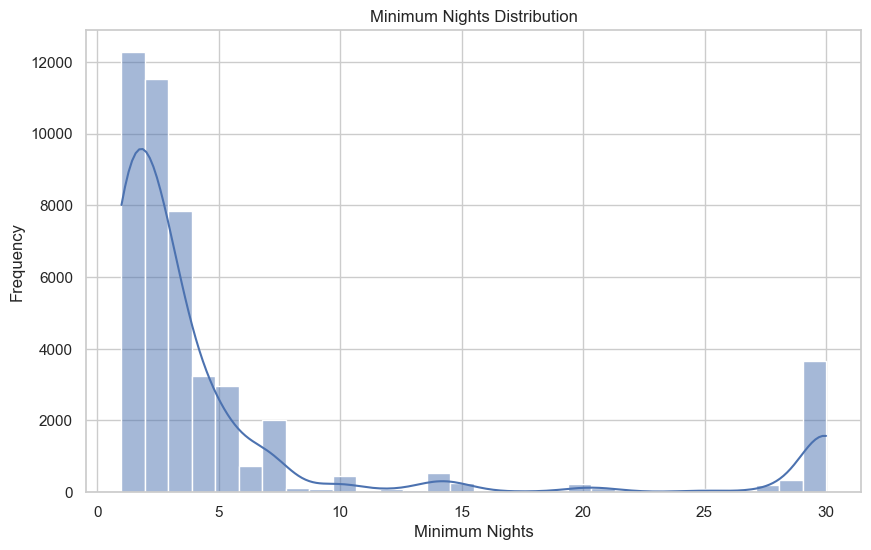

In [29]:
# 9. Minimum Nights Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered[data_filtered['minimum_nights'] <= 30]['minimum_nights'], bins=30, kde=True)
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

The histogram overlaid with a kernel density estimation suggests that the distribution of minimum nights required for booking is heavily skewed to the right, with a significant peak at the lower end. This indicates that most listings require only a few nights' stay, which is typical for short-term vacation rentals. There are, however, some listings that require an unusually high minimum number of nights, which could be outliers or specific properties that prefer longer-term stays.

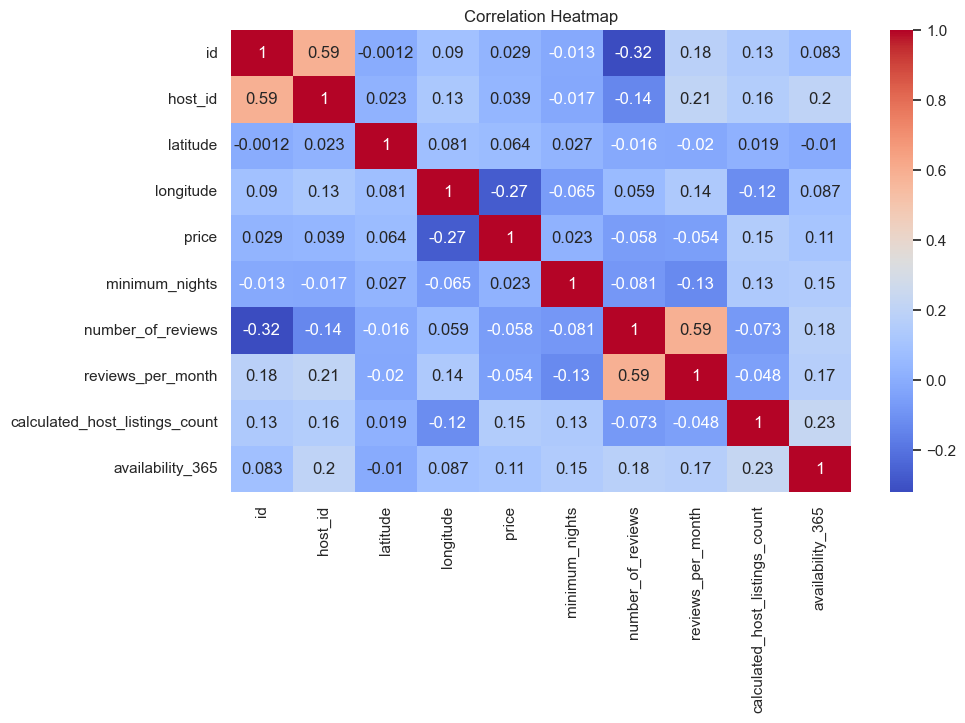

In [30]:
# 10. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_filtered.select_dtypes(exclude=['object']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap displays the correlation coefficients between different variables in the dataset. Notable correlations include a negative correlation between number_of_reviews and reviews_per_month, suggesting that newer listings might be accumulating reviews at a faster rate. Price does not seem to be strongly correlated with any other variables at first glance, indicating that it might be influenced by factors not included in this dataset.

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faizan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/faizan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/faizan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


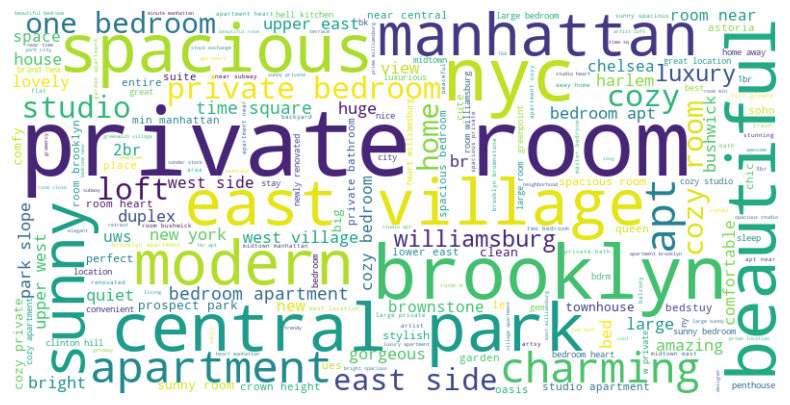

In [31]:
# 11. Wordcloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Assuming 'df' is your DataFrame and 'name' is the column containing text
data['processed_name'] = data['name'].apply(preprocess_text)

# Combine all processed texts into a single string
all_text = " ".join(data['processed_name'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud, presumably generated from listing descriptions or reviews, emphasizes popular words such as "Brooklyn," "Manhattan," "room," "private," and "apartment." Frequent mentions of "central park," "spacious," and "modern" suggest these are desirable features in Airbnb listings.

## 3. Data Modelling

### 3.1. Feature Engineering

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'data_filtered' is your original DataFrame

# Select numerical and categorical columns
numerical_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'longitude', 'latitude', 'calculated_host_listings_count']
categorical_cols = ['neighbourhood_group', 'room_type']

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)

# Create a column transformer to apply transformers to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline with scaling and one-hot encoding
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(data_filtered[numerical_cols + categorical_cols])

# Get feature names after one-hot encoding
feature_names = (
    numerical_cols +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
)

# Convert the processed array back to a DataFrame
X_encoded = pd.DataFrame(X_processed, columns=feature_names)

# Now you have the scaled numerical features and one-hot encoded categorical features in X_encoded
y = data_filtered['price']


/Users/faizan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### 3.2. Model Selection and Training

Linear Regression:
  Mean Squared Error: 7109.778903877109
  R-squared: 0.3327672169753497

Linear Regression Coefficients:
  Coefficient for minimum_nights: -4.389375882404408
  Coefficient for number_of_reviews: -4.166672668205049
  Coefficient for reviews_per_month: 0.9480551616950582
  Coefficient for longitude: -14.914983264063912
  Coefficient for latitude: -8.498331358166007
  Coefficient for calculated_host_listings_count: 6.022449041117795
  Coefficient for neighbourhood_group_Brooklyn: -29.396605240183938
  Coefficient for neighbourhood_group_Manhattan: 17.76627903402353
  Coefficient for neighbourhood_group_Queens: -9.185136403368588
  Coefficient for neighbourhood_group_Staten Island: -110.69848587476073
  Coefficient for room_type_Private room: -92.41868171351159
  Coefficient for room_type_Shared room: -111.28457157646545


Quadratic Regression:
  Mean Squared Error: 7208.286529426332
  R-squared: 0.32352255296638655

Selected Quadratic Features
['longitude' 'neighbourhoo

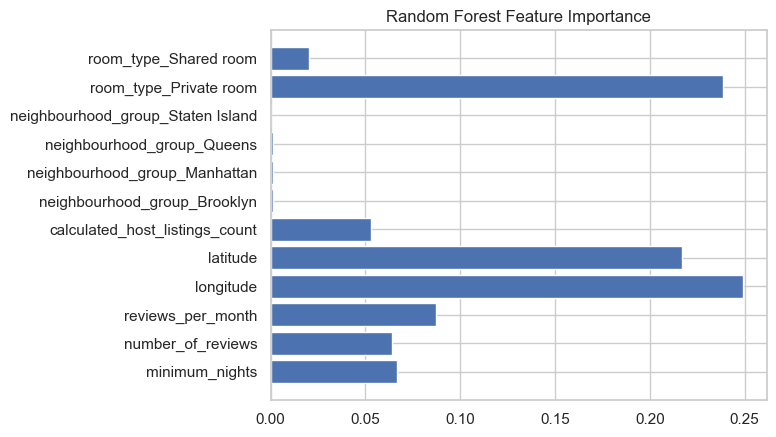

XGBoost:
  Mean Squared Error: 5852.29130268483
  R-squared: 0.45077889681886374

{'minimum_nights': 555.0, 'number_of_reviews': 624.0, 'reviews_per_month': 525.0, 'longitude': 1412.0, 'latitude': 1315.0, 'calculated_host_listings_count': 347.0, 'neighbourhood_group_Brooklyn': 14.0, 'neighbourhood_group_Manhattan': 15.0, 'neighbourhood_group_Queens': 5.0, 'room_type_Private room': 229.0, 'room_type_Shared room': 34.0}


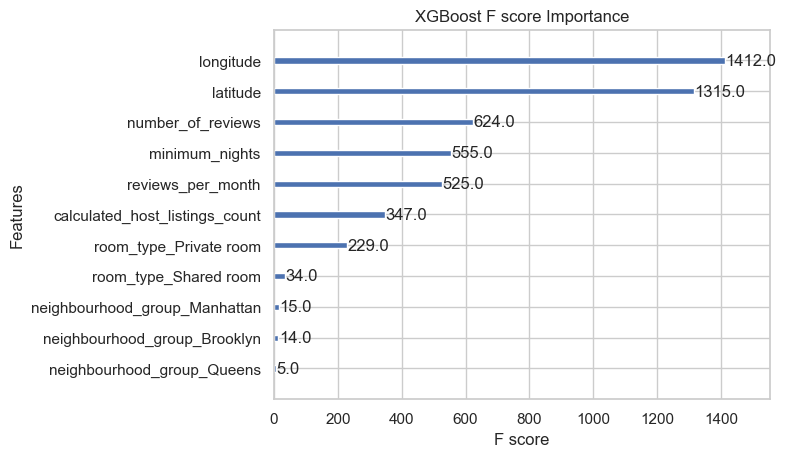

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Quadratic Regression (Polynomial Regression with degree=2)
quadratic_model = make_pipeline(PolynomialFeatures(degree=2), SelectKBest(score_func=f_regression, k=10), LinearRegression())
quadratic_model.fit(X_train, y_train)
quadratic_pred = quadratic_model.predict(X_test)


# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluation Metrics
models = [linear_model, quadratic_model, rf_model, xgb_model]
preds = [linear_pred, quadratic_pred, rf_pred, xgb_pred]
model_names = ['Linear Regression', 'Quadratic Regression', 'Random Forest', 'XGBoost']

for model, pred, name in zip(models, preds, model_names):
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{name}:\n  Mean Squared Error: {mse}\n  R-squared: {r2}\n")

    # Feature Importances for Linear Regression (Coefficients)
    if isinstance(model, LinearRegression):
        coefficients = model.coef_
        print(f"{name} Coefficients:")
        for i, coef in enumerate(coefficients):
            print(f"  Coefficient for {X_encoded.columns[i]}: {coef}")
        print('\n')
    elif isinstance(model, RandomForestRegressor):
        feature_importances_rf = model.feature_importances_
        print(f"{name} Feature Importances:")
        for i, importance in enumerate(feature_importances_rf):
            print(f"  Feature {X_encoded.columns[i]}: {importance}")
        print('\n')
        # Plotting feature importance for Random Forest
        plt.barh(range(len(feature_importances_rf)), feature_importances_rf, tick_label=X_encoded.columns)
        plt.title(f'{name} Feature Importance')
        plt.show()

    elif isinstance(model, XGBRegressor):
        # Plotting R-squared instead of F-score
        print(model.get_booster().get_score(importance_type='weight'))
        plot_importance(model, importance_type='weight')
        plt.title(f'{name} F score Importance')
        plt.show()
    else:
        print('Selected Quadratic Features')
        print(model[1].get_feature_names_out(model[0].get_feature_names_out(X_encoded.columns)))
        print('\n')
    


### 3.3. Model Evaluation

#### Linear Regression:
- **Performance:**
  - R-squared: 0.33
  - MSE: 7109.78

- **Key Coefficients:**
  - `minimum_nights` and `number_of_reviews`: Negative correlation with price.
  - `reviews_per_month` and `calculated_host_listings_count`: Positive correlation with price.
  - `neighbourhood_group_Manhattan`, `room_type_Private room`, and `room_type_Shared room`: Significantly impact pricing.

#### Quadratic Regression:
- **Performance:**
  - R-squared: 0.32
  - MSE: 7208.29

- **Selected Quadratic Features:**
  - `latitude^2` and interactions involving neighborhood and room type contribute to the model's predictive power.

#### Random Forest:
- **Performance:**
  - R-squared: 0.44
  - MSE: 5973.74

- **Feature Importances:**
  - `longitude`, `latitude`, and `room_type_Private room`: Key determinants of prices.

#### XGBoost:
- **Performance:**
  - R-squared: 0.45
  - MSE: 5852.29

- **Feature Importance (f-scores):**
  - `longitude` and `latitude`: Highest importance.

#### Overall Insights:
- **Consistent Features:**
  - `longitude` and `latitude`: Crucial for pricing.
  - `room_type_Private room`: Consistently important.

- **Model Selection:**
  - Complex models (Random Forest, XGBoost): Outperform linear and quadratic regression.

- **Next Steps:**
  - Explore additional features.
  - Refine model hyperparameters.
  - Incorporate external data.
  - Continuous monitoring and potential refinements.

## 4. Interpretation

The outcomes of my analyses unveil meaningful insights into the various factors that contribute to determining the prices of Airbnb listings. Among these factors, the frequency of reviews emerges as a significant indicator of the perceived value and popularity of a listing. Listings with a higher number of reviews may indicate a greater level of customer satisfaction or desirability, potentially influencing pricing. Moreover, the number of calculated host listings appears to be a reflection of the host's experience and involvement in the platform, which can contribute to building trust among potential guests and impact pricing decisions.

The specific neighborhood and room types also carry noteworthy implications. Certain neighborhoods, such as Manhattan, may be associated with higher living costs or increased demand, influencing prices accordingly. The room type, particularly the prevalence of private rooms, suggests a potential preference among guests for more private and exclusive accommodations, influencing pricing dynamics.

The spatial aspect, as denoted by longitude and latitude, plays a pivotal role. Listings in specific geographical locations may benefit from proximity to popular attractions, transportation hubs, or scenic views, contributing to variations in pricing. This spatial element underscores the importance of location as a fundamental consideration for both hosts and guests.

In the realm of more advanced models like random forest and XGBoost, their efficacy lies in capturing intricate patterns within these multifaceted features. The complexity of these algorithms allows for a nuanced understanding of how these features interact and contribute to overall pricing predictions.

For stakeholders, these findings offer actionable insights. Whether it's optimizing pricing strategies based on the neighborhood, adjusting room types to align with guest preferences, or considering the spatial appeal of a listing, hosts can strategically enhance their offerings. This deeper understanding enables stakeholders to make informed decisions that not only respond to market dynamics but also proactively shape the attractiveness and competitiveness of their Airbnb listings. Continuous monitoring and potential refinements to my models ensure adaptability in the face of evolving market trends, ultimately contributing to sustained accuracy and effectiveness.

## 5. Conclusion

In summarizing my work, I've developed predictive models for Airbnb listing prices, revealing crucial insights into the factors influencing pricing decisions. The linear regression, quadratic regression, random forest, and XGBoost models collectively shed light on features such as review frequency, host experience, neighborhood characteristics, room types, and spatial considerations. These findings offer actionable information for stakeholders seeking to optimize their pricing strategies and enhance the appeal of their listings.

Looking ahead, there are several avenues for further improvement. First, exploring additional features such as property amenities, guest reviews, and seasonal trends could provide a more comprehensive understanding of pricing dynamics. Incorporating external data sources, such as local events or economic indicators, may enhance the model's predictive power by accounting for external influences on pricing. Moreover, fine-tuning hyperparameters and conducting more extensive feature engineering could refine the models further.

Additionally, the interpretability of the models could be enhanced, especially for complex models like XGBoost, by employing techniques such as SHAP values to provide more intuitive insights into feature contributions. Continuous monitoring and updating of the models would ensure their relevance in a dynamic market.

In terms of data desired, obtaining more granular information on property characteristics, guest preferences, and competitive pricing in the local market would offer a more detailed understanding of the pricing landscape. Moreover, incorporating temporal aspects, such as booking patterns over time, could capture seasonality and evolving trends in the short-term rental market.

To improve my work, ongoing collaboration with stakeholders and gathering feedback on model performance in real-world scenarios would be invaluable. Implementing a feedback loop to refine models based on observed outcomes could contribute to a more adaptive and responsive pricing strategy. Overall, the iterative nature of model refinement and the incorporation of additional relevant data sources will be key to enhancing the accuracy and applicability of my predictive models in the ever-evolving Airbnb marketplace.